<a href="https://colab.research.google.com/github/HarisMashood/ADL_Exercises/blob/main/Exercise_6_ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from collections import Counter
import requests
import io

In [3]:
# Load the dataset from the GitHub link
url = "https://raw.githubusercontent.com/HarisMashood/ADL_Exercises/main/Tasks/Imbalanced_data.csv"
response = requests.get(url).content
df = pd.read_csv(io.StringIO(response.decode('utf-8')), header=None)

# Separate features and labels
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, 2].values

# Display the original dataset distribution
print(f"Original dataset shape: {Counter(y)}")

Original dataset shape: Counter({0.0: 9900, 1.0: 100})


In [4]:
# Apply SMOTE and Borderline SMOTE
smote = SMOTE(random_state=42)
borderline_smote = BorderlineSMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X, y)

# Display the resampled dataset distributions
print(f"SMOTE resampled dataset shape: {Counter(y_smote)}")
print(f"Borderline SMOTE resampled dataset shape: {Counter(y_borderline_smote)}")

SMOTE resampled dataset shape: Counter({0.0: 9900, 1.0: 9900})
Borderline SMOTE resampled dataset shape: Counter({0.0: 9900, 1.0: 9900})


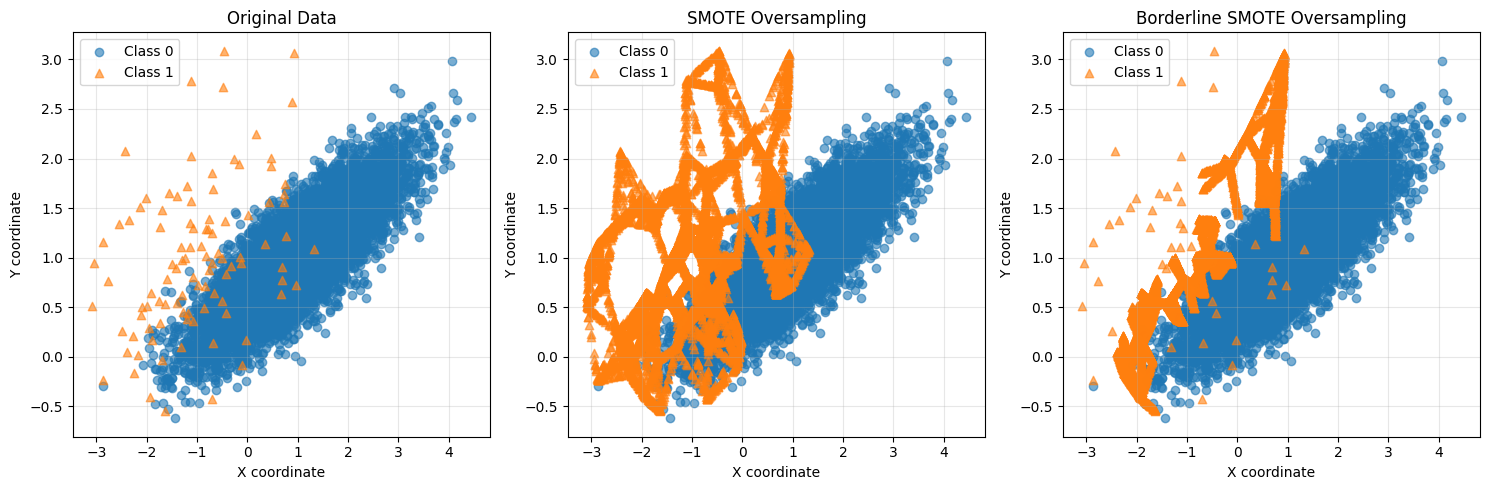

In [5]:
# Plot the original and resampled datasets
plt.figure(figsize=(15, 5))

# Plot the original dataset
plt.subplot(131)
for label in [0, 1]:
    mask = y == label
    plt.scatter(
        X[mask, 0], X[mask, 1], label=f"Class {label}",
        alpha=0.6, marker='o' if label == 0 else '^'
    )
plt.title("Original Data")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.grid(True, alpha=0.3)
plt.legend()

# Plot the SMOTE resampled dataset
plt.subplot(132)
for label in [0, 1]:
    mask = y_smote == label
    plt.scatter(
        X_smote[mask, 0], X_smote[mask, 1], label=f"Class {label}",
        alpha=0.6, marker='o' if label == 0 else '^'
    )
plt.title("SMOTE Oversampling")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.grid(True, alpha=0.3)
plt.legend()

# Plot the Borderline SMOTE resampled dataset
plt.subplot(133)
for label in [0, 1]:
    mask = y_borderline_smote == label
    plt.scatter(
        X_borderline_smote[mask, 0], X_borderline_smote[mask, 1], label=f"Class {label}",
        alpha=0.6, marker='o' if label == 0 else '^'
    )
plt.title("Borderline SMOTE Oversampling")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Save the resampled datasets as CSV files
smote_df = pd.DataFrame(np.column_stack((X_smote, y_smote)))
borderline_smote_df = pd.DataFrame(np.column_stack((X_borderline_smote, y_borderline_smote)))

smote_df.to_csv('SMOTE_data.csv', index=False, header=False)
borderline_smote_df.to_csv('Borderline_SMOTE_data.csv', index=False, header=False)

print("Resampled datasets saved as 'SMOTE_data.csv' and 'Borderline_SMOTE_data.csv'.")

Resampled datasets saved as 'SMOTE_data.csv' and 'Borderline_SMOTE_data.csv'.
